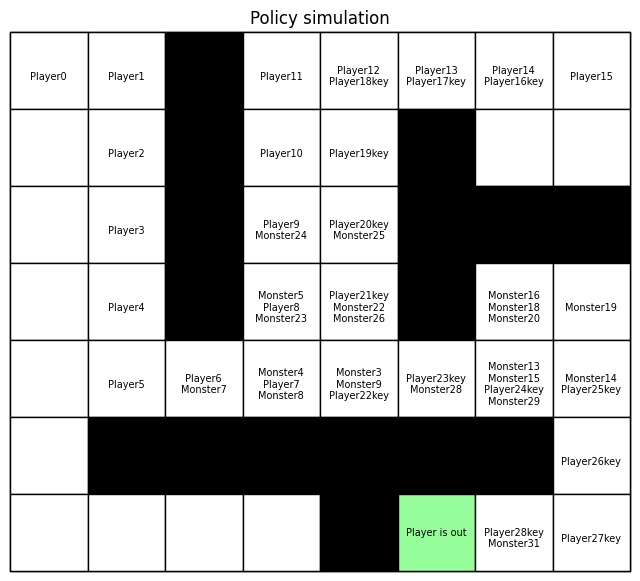

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import problem1_bonus as mz

maze_mat = np.array([
                [0, 0, 1, 0, 0, 0, 0, 0],
                [0, 0, 1, 0, 0, 1, 0, 0],
                [0, 0, 1, 0, 0, 1, 1, 1],
                [0, 0, 1, 0, 0, 1, 0, 0],
                [0, 0, 0, 0, 0, 0, 0, 0],
                [0, 1, 1, 1, 1, 1, 1, 0],
                [0, 0, 0, 0, 1, 2, 0, 0]])
start_pos = (0,0)
minotaur_pos = (6,5)
mz.draw_maze(maze_mat, start_pos, minotaur_pos)

# Create an environment maze
env = mz.Maze_bonus(maze_mat,None,False,False)
# Finite horizon
horizon = 40
# Solve the MDP problem with dynamic programming 
V, policy= mz.dynamic_programming(env,horizon)
method = 'DynProg'
start  = ((0, 0),(6, 5),0)
path = env.simulate(start, policy, method)
mz.animate_solution(maze_mat, path)
#print(path)